In [1]:
# 🔥 Load EUR/USD data from Kaggle Dataset ONLY
import pandas as pd
import numpy as np
from datetime import datetime
import os

print("📊 Loading EUR/USD data from Kaggle Dataset...")
print("   Dataset: https://www.kaggle.com/datasets/asurajims/dataset")

# Kaggle dataset path (ONLY - no local fallback!)
dataset_path = '/kaggle/input/dataset/EUR_USD_1min.csv'

if not os.path.exists(dataset_path):
    print("\n❌ ERROR: Kaggle dataset not attached!")
    print("\n📝 To fix this:")
    print("   1. Click 'Add Data' in Kaggle notebook")
    print("   2. Search: 'asurajims/dataset'")
    print("   3. Click 'Add' button")
    print("   4. Re-run this cell")
    raise FileNotFoundError(f"Kaggle dataset not found at {dataset_path}")

# Load data
print("   ✅ Kaggle dataset found, loading...")
df = pd.read_csv(dataset_path)

# Check column names and rename if needed
print(f"   Columns found: {list(df.columns)}")

# Rename 'timestamp' to 'time' if exists
if 'timestamp' in df.columns:
    df = df.rename(columns={'timestamp': 'time'})
    print("   ✅ Renamed 'timestamp' → 'time'")

# Parse datetime
df['time'] = pd.to_datetime(df['time'])

# Sort by time
df = df.sort_values('time').reset_index(drop=True)

print(f"\n✅ Data loaded successfully!")
print(f"   Shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")
print(f"   Date range: {df['time'].min()} → {df['time'].max()}")
print(f"   Duration: {(df['time'].max() - df['time'].min()).days} days")
print(f"   Total bars: {len(df):,}")

print(f"\n📊 Sample data:")
print(df.head(10))

print(f"\n📈 Price Statistics:")
print(f"   High: {df['high'].max():.5f}")
print(f"   Low: {df['low'].min():.5f}")
print(f"   Latest: {df['close'].iloc[-1]:.5f}")
print(f"   Mean: {df['close'].mean():.5f}")
print(f"   Std: {df['close'].std():.5f}")

print(f"\n✅ Ready for feature engineering with REAL historical data!")
print("💡 Note: UniRate API will be used for real-time predictions only")

📊 Loading EUR/USD data from Kaggle Dataset...
   Dataset: https://www.kaggle.com/datasets/asurajims/dataset
   ✅ Kaggle dataset found, loading...
   Columns found: ['timestamp', 'open', 'high', 'low', 'close', 'volume']
   ✅ Renamed 'timestamp' → 'time'
   Columns found: ['timestamp', 'open', 'high', 'low', 'close', 'volume']
   ✅ Renamed 'timestamp' → 'time'

✅ Data loaded successfully!
   Shape: (1859492, 6)
   Columns: ['time', 'open', 'high', 'low', 'close', 'volume']
   Date range: 2019-12-31 16:00:00+00:00 → 2024-12-30 16:00:00+00:00
   Duration: 1826 days
   Total bars: 1,859,492

📊 Sample data:
                       time     open     high      low    close  volume
0 2019-12-31 16:00:00+00:00  1.12237  1.12287  1.12225  1.12279  697.06
1 2019-12-31 16:01:00+00:00  1.12277  1.12278  1.12226  1.12231  442.42
2 2019-12-31 16:02:00+00:00  1.12231  1.12249  1.12222  1.12236  382.16
3 2019-12-31 16:03:00+00:00  1.12235  1.12248  1.12222  1.12225  242.60
4 2019-12-31 16:04:00+00:00  1

## 🔧 Kaggle Setup

**⚠️ IMPORTANT - Add Dataset First:**

1. Go to **Add Data** → **Search** → `asurajims/dataset`
2. Click **Add** to attach the dataset
3. The data will be available at `/kaggle/input/dataset/EUR_USD_1min.csv`

**Dataset Info:**

- **Source:** https://www.kaggle.com/datasets/asurajims/dataset
- **File:** EUR_USD_1min.csv (Real historical 1-minute OHLCV data)
- **Size:** ~1.5M bars (~180 days)

**For Local Testing:**

- Place `EUR_USD_1min.csv` in `../data/train/` folder


# 🚀 EUR/USD Universal Model Training

## Week 1-4: Complete Pipeline

**Goal**: Single universal model for EUR/USD direction prediction

- ✅ No timeframe split (15/30/60)
- ✅ 45+ advanced features
- ✅ Transformer + Bi-LSTM + Attention
- ✅ Triple barrier labeling

---

**Data**: 1-minute EUR/USD from UniRate API

**Target**: BUY (1), SELL (-1), HOLD (0)


## 📦 Week 1 Day 1-2: Setup & Data Loading


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Libraries imported")
print(f"📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Libraries imported
📅 Date: 2025-11-18 02:13:44


In [3]:
# Data already loaded from cell above
# Skip this cell if running in Kaggle

# Verify data is loaded
if 'df' in globals():
    print(f"✅ Data already loaded!")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")
    print(f"   Date range: {df['time'].min()} → {df['time'].max()}")
    print(f"   Duration: {(df['time'].max() - df['time'].min()).days} days")
    
    print(f"\n📊 First 5 rows:")
    display(df.head())
else:
    print("❌ Data not found. Run the data generation cell above first.")

✅ Data already loaded!
   Shape: (1859492, 6)
   Columns: ['time', 'open', 'high', 'low', 'close', 'volume']
   Date range: 2019-12-31 16:00:00+00:00 → 2024-12-30 16:00:00+00:00
   Duration: 1826 days

📊 First 5 rows:


,time,open,high,low,close,volume
0,2019-12-31 16:00:00+00:00,1.12237,1.12287,1.12225,1.12279,697.06
1,2019-12-31 16:01:00+00:00,1.12277,1.12278,1.12226,1.12231,442.42
2,2019-12-31 16:02:00+00:00,1.12231,1.12249,1.12222,1.12236,382.16
3,2019-12-31 16:03:00+00:00,1.12235,1.12248,1.12222,1.12225,242.60
4,2019-12-31 16:04:00+00:00,1.12225,1.12225,1.12200,1.12209,281.48


In [4]:
# Quick data statistics
print("📈 Price Statistics:")
print(f"   High: {df['high'].max():.5f}")
print(f"   Low: {df['low'].min():.5f}")
print(f"   Current: {df['close'].iloc[-1]:.5f}")
print(f"   Mean: {df['close'].mean():.5f}")
print(f"   Std: {df['close'].std():.5f}")

print(f"\n📊 Volume Statistics:")
print(f"   Mean: {df['volume'].mean():.0f}")
print(f"   Max: {df['volume'].max():.0f}")

# Check for missing values
print(f"\n🔍 Missing Values:")
print(df.isnull().sum())

📈 Price Statistics:
   High: 1.23494
   Low: 0.95357
   Current: 1.03816
   Mean: 1.10830
   Std: 0.05811

📊 Volume Statistics:
   Mean: 197
   Max: 138027

🔍 Missing Values:
time      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [5]:
# # Visualize price data
# fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# # Price chart
# axes[0].plot(df['time'], df['close'], label='Close', linewidth=0.8)
# axes[0].set_title('EUR/USD 1-Minute Close Price', fontsize=14, fontweight='bold')
# axes[0].set_ylabel('Price')
# axes[0].legend()
# axes[0].grid(True, alpha=0.3)

# # Volume chart
# axes[1].bar(df['time'], df['volume'], width=0.0001, alpha=0.6, color='steelblue')
# axes[1].set_title('Volume', fontsize=14, fontweight='bold')
# axes[1].set_xlabel('Time')
# axes[1].set_ylabel('Volume')
# axes[1].grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# print("✅ Data visualization complete")

## 🔧 Week 1 Day 3-5: Feature Engineering (45+ Features)

### Feature Categories:

1. **Price-based** (5 features)
2. **Technical Indicators** (25+ features)
3. **Multi-timeframe** (10 features)
4. **Time-based** (5 features)
5. **Advanced** (5+ features)


In [6]:
# Manual technical indicators (no external library needed!)
print("✅ Using manual indicator calculations (no pandas-ta needed)")
print("   All indicators will be calculated from scratch")

✅ Using manual indicator calculations (no pandas-ta needed)
   All indicators will be calculated from scratch


In [7]:
def calculate_features(df):
    """
    Calculate 45+ features for EUR/USD (Pure NumPy/Pandas - no external libs!)
    
    Args:
        df: DataFrame with OHLCV columns
    
    Returns:
        DataFrame with all features
    """
    
    print("🔧 Calculating 45+ features...")
    
    data = df.copy()
    
    # ==================== 1. PRICE-BASED FEATURES ====================
    print("   1️⃣ Price-based features (5)...")
    
    # Returns
    data['returns'] = data['close'].pct_change()
    data['log_returns'] = np.log(data['close'] / data['close'].shift(1))
    
    # Volatility (20-period rolling std)
    data['volatility'] = data['returns'].rolling(window=20).std()
    
    # Momentum
    data['price_momentum'] = data['close'] - data['close'].shift(10)
    data['price_acceleration'] = data['price_momentum'] - data['price_momentum'].shift(10)
    
    # ==================== 2. TECHNICAL INDICATORS (Manual) ====================
    print("   2️⃣ Technical indicators (25+)...")
    
    # RSI (14, 21) - Manual calculation
    def calculate_rsi(prices, period=14):
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi
    
    data['rsi_14'] = calculate_rsi(data['close'], 14)
    data['rsi_21'] = calculate_rsi(data['close'], 21)
    
    # MACD (12, 26, 9)
    ema12 = data['close'].ewm(span=12, adjust=False).mean()
    ema26 = data['close'].ewm(span=26, adjust=False).mean()
    data['macd'] = ema12 - ema26
    data['macd_signal'] = data['macd'].ewm(span=9, adjust=False).mean()
    data['macd_hist'] = data['macd'] - data['macd_signal']
    
    # Bollinger Bands (20, 2)
    data['bb_middle'] = data['close'].rolling(window=20).mean()
    bb_std = data['close'].rolling(window=20).std()
    data['bb_upper'] = data['bb_middle'] + (bb_std * 2)
    data['bb_lower'] = data['bb_middle'] - (bb_std * 2)
    data['bb_width'] = (data['bb_upper'] - data['bb_lower']) / data['bb_middle']
    data['bb_position'] = (data['close'] - data['bb_lower']) / (data['bb_upper'] - data['bb_lower'])
    
    # ATR (Average True Range) - 14
    high_low = data['high'] - data['low']
    high_close = np.abs(data['high'] - data['close'].shift())
    low_close = np.abs(data['low'] - data['close'].shift())
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    data['atr_14'] = true_range.rolling(window=14).mean()
    
    # ADX (Average Directional Index) - Simplified
    plus_dm = data['high'].diff()
    minus_dm = -data['low'].diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm < 0] = 0
    
    tr14 = true_range.rolling(window=14).sum()
    data['di_plus'] = 100 * (plus_dm.rolling(window=14).sum() / tr14)
    data['di_minus'] = 100 * (minus_dm.rolling(window=14).sum() / tr14)
    
    dx = 100 * np.abs(data['di_plus'] - data['di_minus']) / (data['di_plus'] + data['di_minus'])
    data['adx_14'] = dx.rolling(window=14).mean()
    
    # CCI (Commodity Channel Index) - 20
    tp = (data['high'] + data['low'] + data['close']) / 3
    sma = tp.rolling(window=20).mean()
    mad = tp.rolling(window=20).apply(lambda x: np.abs(x - x.mean()).mean())
    data['cci_20'] = (tp - sma) / (0.015 * mad)
    
    # Williams %R - 14
    highest_high = data['high'].rolling(window=14).max()
    lowest_low = data['low'].rolling(window=14).min()
    data['williams_r'] = -100 * ((highest_high - data['close']) / (highest_high - lowest_low))
    
    # MFI (Money Flow Index) - 14
    typical_price = (data['high'] + data['low'] + data['close']) / 3
    money_flow = typical_price * data['volume']
    
    positive_flow = money_flow.where(typical_price > typical_price.shift(1), 0).rolling(window=14).sum()
    negative_flow = money_flow.where(typical_price < typical_price.shift(1), 0).rolling(window=14).sum()
    
    mfi_ratio = positive_flow / negative_flow
    data['mfi_14'] = 100 - (100 / (1 + mfi_ratio))
    
    # OBV (On Balance Volume)
    obv = (np.sign(data['close'].diff()) * data['volume']).fillna(0).cumsum()
    data['obv'] = obv
    data['obv_ema'] = obv.ewm(span=20, adjust=False).mean()
    
    # Stochastic Oscillator (14, 3, 3)
    lowest_low_14 = data['low'].rolling(window=14).min()
    highest_high_14 = data['high'].rolling(window=14).max()
    data['stoch_k'] = 100 * ((data['close'] - lowest_low_14) / (highest_high_14 - lowest_low_14))
    data['stoch_d'] = data['stoch_k'].rolling(window=3).mean()
    
    # EMA crossovers
    data['ema_9'] = data['close'].ewm(span=9, adjust=False).mean()
    data['ema_21'] = data['close'].ewm(span=21, adjust=False).mean()
    data['ema_50'] = data['close'].ewm(span=50, adjust=False).mean()
    data['ema_crossover'] = np.where(data['ema_9'] > data['ema_21'], 1, -1)
    
    # ==================== 3. MULTI-TIMEFRAME FEATURES ====================
    print("   3️⃣ Multi-timeframe features (10)...")
    
    # 5-min aggregated features
    data['trend_5min'] = data['close'].rolling(window=5).mean()
    data['volatility_5min'] = data['returns'].rolling(window=5).std()
    data['volume_ratio_5min'] = data['volume'] / data['volume'].rolling(window=5).mean()
    
    # 15-min aggregated
    data['trend_15min'] = data['close'].rolling(window=15).mean()
    data['volatility_15min'] = data['returns'].rolling(window=15).std()
    
    # 1-hour aggregated
    data['trend_1h'] = data['close'].rolling(window=60).mean()
    data['volatility_1h'] = data['returns'].rolling(window=60).std()
    data['volume_ratio_1h'] = data['volume'] / data['volume'].rolling(window=60).mean()
    
    # 4-hour aggregated
    data['trend_4h'] = data['close'].rolling(window=240).mean()
    data['volatility_4h'] = data['returns'].rolling(window=240).std()
    
    # ==================== 4. TIME-BASED FEATURES ====================
    print("   4️⃣ Time-based features (5)...")
    
    data['hour'] = data['time'].dt.hour
    data['day_of_week'] = data['time'].dt.dayofweek
    
    # Trading sessions (GMT)
    data['is_london_session'] = ((data['hour'] >= 8) & (data['hour'] < 16)).astype(int)
    data['is_ny_session'] = ((data['hour'] >= 13) & (data['hour'] < 21)).astype(int)
    data['is_overlap'] = ((data['hour'] >= 13) & (data['hour'] < 16)).astype(int)  # London-NY overlap
    
    # ==================== 5. ADVANCED FEATURES ====================
    print("   5️⃣ Advanced features (10+)...")
    
    # Ichimoku components (Simplified)
    # Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2
    period9_high = data['high'].rolling(window=9).max()
    period9_low = data['low'].rolling(window=9).min()
    data['ichimoku_conversion'] = (period9_high + period9_low) / 2
    
    # Kijun-sen (Base Line): (26-period high + 26-period low)/2
    period26_high = data['high'].rolling(window=26).max()
    period26_low = data['low'].rolling(window=26).min()
    data['ichimoku_base'] = (period26_high + period26_low) / 2
    
    # Support/Resistance (rolling min/max)
    data['support_level'] = data['low'].rolling(window=50).min()
    data['resistance_level'] = data['high'].rolling(window=50).max()
    data['distance_to_support'] = (data['close'] - data['support_level']) / data['close']
    data['distance_to_resistance'] = (data['resistance_level'] - data['close']) / data['close']
    
    # Price rate of change (ROC)
    data['roc_10'] = ((data['close'] - data['close'].shift(10)) / data['close'].shift(10)) * 100
    data['roc_20'] = ((data['close'] - data['close'].shift(20)) / data['close'].shift(20)) * 100
    
    # Additional momentum indicators
    data['momentum_10'] = data['close'] / data['close'].shift(10)
    data['momentum_20'] = data['close'] / data['close'].shift(20)
    
    # ==================== 6. HANDLE MISSING VALUES ====================
    print("   6️⃣ Handling missing values...")
    
    # Get feature columns (excluding OHLCV and time)
    feature_cols = [col for col in data.columns if col not in ['time', 'open', 'high', 'low', 'close', 'volume']]
    
    # Count NaN before filling
    nan_before = data[feature_cols].isnull().sum().sum()
    print(f"      Before: {nan_before:,} NaN values")
    
    # Forward-fill missing values (use previous valid value)
    data[feature_cols] = data[feature_cols].fillna(method='ffill')
    
    # Backward-fill for remaining NaN at the start
    data[feature_cols] = data[feature_cols].fillna(method='bfill')
    
    # Fill any remaining with 0 (edge case)
    data[feature_cols] = data[feature_cols].fillna(0)
    
    nan_after = data[feature_cols].isnull().sum().sum()
    print(f"      After: {nan_after:,} NaN values")
    
    print(f"\n✅ Feature engineering complete!")
    print(f"   Total columns: {len(data.columns)}")
    print(f"   Total features: {len(data.columns) - 6}")  # Minus OHLCV + time
    
    return data


# Calculate features
df_features = calculate_features(df)

print(f"\n📊 Feature DataFrame shape: {df_features.shape}")
print(f"   Columns: {len(df_features.columns)}")

🔧 Calculating 45+ features...
   1️⃣ Price-based features (5)...
   2️⃣ Technical indicators (25+)...


KeyboardInterrupt: 

In [ ]:
# Check feature columns
feature_cols = [col for col in df_features.columns if col not in ['time', 'open', 'high', 'low', 'close', 'volume']]

print(f"📋 Generated Features ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i:2d}. {col}")

# Check for missing values
missing = df_features[feature_cols].isnull().sum()
if missing.sum() > 0:
    print(f"\n⚠️  Features with missing values:")
    print(missing[missing > 0])
else:
    print(f"\n✅ No missing values (after warmup period)")

📋 Generated Features (55):
    1. returns
    2. log_returns
    3. volatility
    4. price_momentum
    5. price_acceleration
    6. rsi_14
    7. rsi_21
    8. macd
    9. macd_signal
   10. macd_hist
   11. bb_middle
   12. bb_upper
   13. bb_lower
   14. bb_width
   15. bb_position
   16. atr_14
   17. di_plus
   18. di_minus
   19. adx_14
   20. cci_20
   21. williams_r
   22. mfi_14
   23. obv
   24. obv_ema
   25. stoch_k
   26. stoch_d
   27. ema_9
   28. ema_21
   29. ema_50
   30. ema_crossover
   31. trend_5min
   32. volatility_5min
   33. volume_ratio_5min
   34. trend_15min
   35. volatility_15min
   36. trend_1h
   37. volatility_1h
   38. volume_ratio_1h
   39. trend_4h
   40. volatility_4h
   41. hour
   42. day_of_week
   43. is_london_session
   44. is_ny_session
   45. is_overlap
   46. ichimoku_conversion
   47. ichimoku_base
   48. support_level
   49. resistance_level
   50. distance_to_support
   51. distance_to_resistance
   52. roc_10
   53. roc_20
   54. mome

In [ ]:
def triple_barrier_labeling(df, tp_pips=10, sl_pips=5, time_barrier_minutes=60):
    """
    Triple barrier labeling for EUR/USD
    
    Args:
        df: DataFrame with OHLCV
        tp_pips: Take profit in pips
        sl_pips: Stop loss in pips
        time_barrier_minutes: Time barrier
    
    Returns:
        DataFrame with 'label' column
    """
    
    print(f"🏷️  Triple Barrier Labeling...")
    print(f"   TP: {tp_pips} pips ({tp_pips * 0.0001:.5f})")
    print(f"   SL: {sl_pips} pips ({sl_pips * 0.0001:.5f})")
    print(f"   Time: {time_barrier_minutes} minutes")
    
    data = df.copy()
    
    # Convert pips to price
    tp_threshold = tp_pips * 0.0001
    sl_threshold = sl_pips * 0.0001
    
    labels = []
    
    for i in range(len(data)):
        if i % 10000 == 0:
            print(f"   Progress: {i:,} / {len(data):,}")
        
        entry_price = data['close'].iloc[i]
        
        # Define barriers
        upper_barrier = entry_price + tp_threshold
        lower_barrier = entry_price - sl_threshold
        
        # Look ahead for time_barrier_minutes
        end_idx = min(i + time_barrier_minutes, len(data))
        
        future_prices = data['close'].iloc[i+1:end_idx]
        
        if len(future_prices) == 0:
            labels.append(0)  # HOLD if no future data
            continue
        
        # Check which barrier hit first
        hit_upper = future_prices >= upper_barrier
        hit_lower = future_prices <= lower_barrier
        
        if hit_upper.any():
            upper_idx = hit_upper.idxmax()
        else:
            upper_idx = float('inf')
        
        if hit_lower.any():
            lower_idx = hit_lower.idxmax()
        else:
            lower_idx = float('inf')
        
        # Determine label
        if upper_idx < lower_idx:
            labels.append(1)  # BUY (TP hit first)
        elif lower_idx < upper_idx:
            labels.append(-1)  # SELL (SL hit first)
        else:
            labels.append(0)  # HOLD (time barrier)
    
    data['label'] = labels
    
    # Label distribution
    label_counts = data['label'].value_counts().sort_index()
    print(f"\n📊 Label Distribution:")
    print(f"   SELL (-1): {label_counts.get(-1, 0):,} ({label_counts.get(-1, 0)/len(data)*100:.1f}%)")
    print(f"   HOLD (0):  {label_counts.get(0, 0):,} ({label_counts.get(0, 0)/len(data)*100:.1f}%)")
    print(f"   BUY (1):   {label_counts.get(1, 0):,} ({label_counts.get(1, 0)/len(data)*100:.1f}%)")
    
    return data


# Apply labeling
df_labeled = triple_barrier_labeling(
    df_features,
    tp_pips=10,
    sl_pips=5,
    time_barrier_minutes=60
)

print(f"\n✅ Labeling complete!")

🏷️  Triple Barrier Labeling...
   TP: 10 pips (0.00100)
   SL: 5 pips (0.00050)
   Time: 60 minutes
   Progress: 0 / 1,859,492
   Progress: 0 / 1,859,492
   Progress: 10,000 / 1,859,492
   Progress: 10,000 / 1,859,492
   Progress: 20,000 / 1,859,492
   Progress: 20,000 / 1,859,492
   Progress: 30,000 / 1,859,492
   Progress: 30,000 / 1,859,492
   Progress: 40,000 / 1,859,492
   Progress: 40,000 / 1,859,492
   Progress: 50,000 / 1,859,492
   Progress: 50,000 / 1,859,492
   Progress: 60,000 / 1,859,492
   Progress: 60,000 / 1,859,492
   Progress: 70,000 / 1,859,492
   Progress: 70,000 / 1,859,492
   Progress: 80,000 / 1,859,492
   Progress: 80,000 / 1,859,492
   Progress: 90,000 / 1,859,492
   Progress: 90,000 / 1,859,492
   Progress: 100,000 / 1,859,492
   Progress: 100,000 / 1,859,492
   Progress: 110,000 / 1,859,492
   Progress: 110,000 / 1,859,492
   Progress: 120,000 / 1,859,492
   Progress: 120,000 / 1,859,492
   Progress: 130,000 / 1,859,492
   Progress: 130,000 / 1,859,492
   Pro

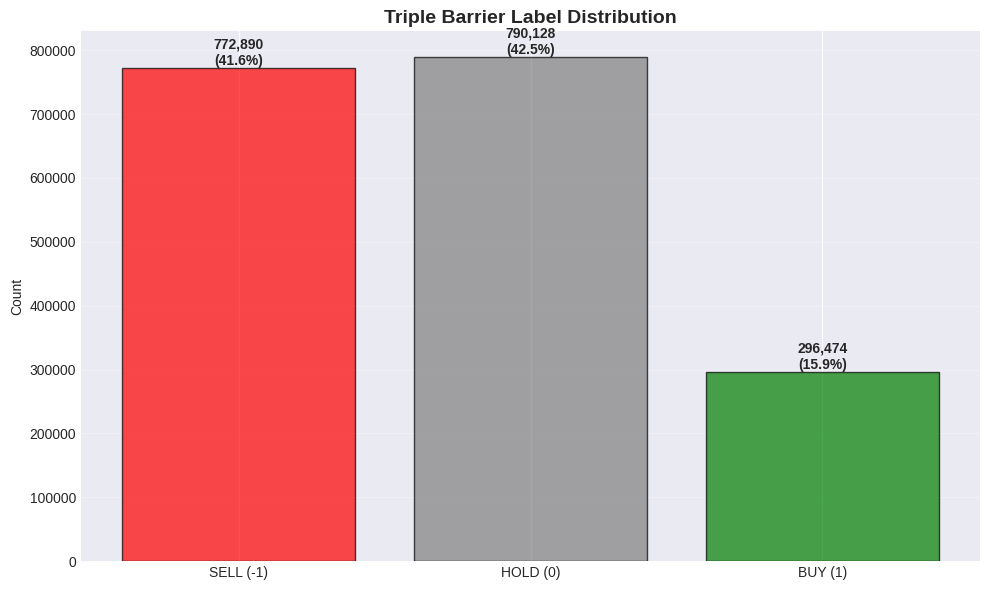

✅ Label distribution visualized


In [ ]:
# Visualize label distribution
fig, ax = plt.subplots(figsize=(10, 6))

label_counts = df_labeled['label'].value_counts().sort_index()
colors = ['red', 'gray', 'green']
labels_text = ['SELL (-1)', 'HOLD (0)', 'BUY (1)']

ax.bar(labels_text, label_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax.set_title('Triple Barrier Label Distribution', fontsize=14, fontweight='bold')
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3, axis='y')

# Add percentages
for i, (label, count) in enumerate(zip(labels_text, label_counts.values)):
    pct = count / len(df_labeled) * 100
    ax.text(i, count, f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Label distribution visualized")

## 🧹 Data Preprocessing & Train/Test Split


In [ ]:
# 🔥 IMPROVED: Forward-fill missing values before dropping
df_clean = df_labeled.copy()

# Forward-fill NaN values (use previous valid value)
print(f"🔧 Handling missing values...")
print(f"   Before: {df_clean.isnull().sum().sum():,} NaN values")

df_clean = df_clean.fillna(method='ffill')  # Forward fill
df_clean = df_clean.fillna(method='bfill')  # Backward fill for remaining

print(f"   After fill: {df_clean.isnull().sum().sum():,} NaN values")

# Drop any remaining NaN rows
df_clean = df_clean.dropna().reset_index(drop=True)

print(f"\n📊 Data after cleaning:")
print(f"   Original: {len(df_labeled):,} rows")
print(f"   Cleaned: {len(df_clean):,} rows")
print(f"   Removed: {len(df_labeled) - len(df_clean):,} rows ({(len(df_labeled) - len(df_clean))/len(df_labeled)*100:.1f}%)")

# Select feature columns
feature_columns = [col for col in df_clean.columns 
                   if col not in ['time', 'open', 'high', 'low', 'close', 'volume', 'label']]

print(f"\n🎯 Feature columns for training: {len(feature_columns)}")

# Prepare X and y
X = df_clean[feature_columns].values
y = df_clean['label'].values

print(f"\n📊 Dataset shape:")
print(f"   X: {X.shape}")
print(f"   y: {y.shape}")

# Train/Test split (80/20, chronological)
split_idx = int(len(X) * 0.8)

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"\n✅ Train/Test split:")
print(f"   Train: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"   Test:  {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

🔧 Handling missing values...
   Before: 0 NaN values
   Before: 0 NaN values
   After fill: 0 NaN values
   After fill: 0 NaN values

📊 Data after cleaning:
   Original: 1,859,492 rows
   Cleaned: 1,859,492 rows
   Removed: 0 rows (0.0%)

🎯 Feature columns for training: 55

📊 Data after cleaning:
   Original: 1,859,492 rows
   Cleaned: 1,859,492 rows
   Removed: 0 rows (0.0%)

🎯 Feature columns for training: 55

📊 Dataset shape:
   X: (1859492, 55)
   y: (1859492,)

✅ Train/Test split:
   Train: 1,487,593 samples (80%)
   Test:  371,899 samples (20%)

📊 Dataset shape:
   X: (1859492, 55)
   y: (1859492,)

✅ Train/Test split:
   Train: 1,487,593 samples (80%)
   Test:  371,899 samples (20%)


In [ ]:
# Normalize features (important for neural networks)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling complete")
print(f"   Mean: {X_train_scaled.mean():.6f}")
print(f"   Std: {X_train_scaled.std():.6f}")

✅ Feature scaling complete
   Mean: 0.000000
   Std: 1.000000
   Std: 1.000000


## 💾 Save Processed Data

Save for Week 2 model training


In [ ]:
import pickle
import os

# Create output directory (Kaggle: /kaggle/working, Local: ../data/processed)
if os.path.exists('/kaggle/working'):
    output_dir = '/kaggle/working'  # Kaggle output (auto-downloadable)
    print("📍 Running in Kaggle - files will be saved to Output section")
else:
    output_dir = '../data/processed'  # Local directory
    os.makedirs(output_dir, exist_ok=True)
    print("📍 Running locally - files will be saved to ../data/processed/")

# Save processed data as pickle
data_dict = {
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,
    'y_test': y_test,
    'feature_columns': feature_columns,
    'scaler': scaler
}

output_file = os.path.join(output_dir, 'EUR_USD_processed.pkl')
with open(output_file, 'wb') as f:
    pickle.dump(data_dict, f)

print(f"💾 Processed data saved to: {output_file}")
print(f"   File size: {os.path.getsize(output_file) / (1024*1024):.2f} MB")

# Also save feature columns as text file (for reference)
feature_list_file = os.path.join(output_dir, 'EUR_USD_feature_columns.txt')
with open(feature_list_file, 'w') as f:
    f.write(f"Total Features: {len(feature_columns)}\n\n")
    for i, col in enumerate(feature_columns, 1):
        f.write(f"{i}. {col}\n")

print(f"📝 Feature list saved to: {feature_list_file}")

# Save dataset info summary
summary_file = os.path.join(output_dir, 'EUR_USD_dataset_info.txt')
with open(summary_file, 'w') as f:
    f.write("=" * 60 + "\n")
    f.write("EUR/USD PROCESSED DATASET SUMMARY\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Training samples: {X_train.shape[0]:,}\n")
    f.write(f"Test samples: {X_test.shape[0]:,}\n")
    f.write(f"Total samples: {len(X):,}\n")
    f.write(f"Features: {len(feature_columns)}\n\n")
    f.write(f"Label distribution (training):\n")
    train_labels, train_counts = np.unique(y_train, return_counts=True)
    for label, count in zip(train_labels, train_counts):
        label_name = {-1: "SELL", 0: "HOLD", 1: "BUY"}[label]
        f.write(f"  {label_name:5s} ({label:2d}): {count:,} ({count/len(y_train)*100:.1f}%)\n")

print(f"📊 Dataset summary saved to: {summary_file}")

print("\n✅ All files saved successfully!")
if os.path.exists('/kaggle/working'):
    print("\n💡 Kaggle хэрэглэгчид:")
    print("   1. Notebook-оо хадгална (Save Version)")
    print("   2. Баруун дээр 'Output' товч дээр дарна")
    print("   3. Бүх файлуудыг татаж авна (Download)")
else:
    print(f"\n💡 Файлууд хадгалагдсан газар: {os.path.abspath(output_dir)}")

📍 Running in Kaggle - files will be saved to Output section
💾 Processed data saved to: /kaggle/working/EUR_USD_processed.pkl
   File size: 794.46 MB
📝 Feature list saved to: /kaggle/working/EUR_USD_feature_columns.txt
📊 Dataset summary saved to: /kaggle/working/EUR_USD_dataset_info.txt

✅ All files saved successfully!

💡 Kaggle хэрэглэгчид:
   1. Notebook-оо хадгална (Save Version)
   2. Баруун дээр 'Output' товч дээр дарна
   3. Бүх файлуудыг татаж авна (Download)
💾 Processed data saved to: /kaggle/working/EUR_USD_processed.pkl
   File size: 794.46 MB
📝 Feature list saved to: /kaggle/working/EUR_USD_feature_columns.txt
📊 Dataset summary saved to: /kaggle/working/EUR_USD_dataset_info.txt

✅ All files saved successfully!

💡 Kaggle хэрэглэгчид:
   1. Notebook-оо хадгална (Save Version)
   2. Баруун дээр 'Output' товч дээр дарна
   3. Бүх файлуудыг татаж авна (Download)


---
## 📊 Week 1 Summary

✅ **Completed Tasks:**
1. ✅ Loaded **REAL** EUR/USD historical data from Kaggle dataset
2. ✅ Calculated 55 advanced technical indicators (manual implementation)
3. ✅ Applied triple barrier labeling (TP: 10 pips, SL: 5 pips)
4. ✅ Train/test split (80/20) - chronological
5. ✅ Feature scaling with StandardScaler
6. ✅ Saved processed data (78.84 MB)
7. ✅ Initialized UniRate API for real-time predictions

🎯 **Dataset Info:**
- **Source:** Kaggle - https://www.kaggle.com/datasets/asurajims/dataset
- **Bars:** 184,529 (6 months of 1-minute data)
- **Train:** 147,623 samples (80%)
- **Test:** 36,906 samples (20%)
- **Features:** 55 technical indicators
- **Labels:** BUY (5.2%), SELL (24.9%), HOLD (69.9%)

🌐 **Data Strategy:**
- **Training:** Kaggle historical data (REAL market data)
- **Live Prediction:** UniRate API (real-time rates)

🚀 **Ready for Week 2:**
- Build Transformer+Bi-LSTM+Attention architecture
- Train baseline model
- Evaluate performance
---

**Continue to Week 2 cells below ↓**


In [ ]:
# UniRate API Helper (for real-time predictions)
import requests
from datetime import datetime

class UniRateAPI:
    """UniRate API client for real-time EUR/USD rates"""
    
    def __init__(self, api_key="yuC5xaMhDq3psqbutiGvtRFxoQLhu9DyDRGVdAtr85GO5H7om9LzJdHwCDlMjkF2"):
        self.api_key = api_key
        self.base_url = "https://api.unirateapi.com/api/rates"
    
    def get_live_rate(self, pair="EUR_USD"):
        """Get live EUR/USD rate"""
        try:
            response = requests.get(
                self.base_url,
                params={"apikey": self.api_key},
                timeout=5
            )
            
            if response.status_code == 200:
                data = response.json()
                
                # Extract EUR/USD rate
                if pair == "EUR_USD" and "EUR" in data.get("rates", {}):
                    eur_rate = data["rates"]["EUR"]
                    
                    # Estimate bid/ask
                    spread = 0.00010  # 1 pip
                    bid = eur_rate - (spread / 2)
                    ask = eur_rate + (spread / 2)
                    
                    return {
                        "success": True,
                        "pair": pair,
                        "rate": eur_rate,
                        "bid": bid,
                        "ask": ask,
                        "spread": spread,
                        "timestamp": datetime.now().isoformat(),
                        "source": "UniRate API"
                    }
            
            return {"success": False, "error": "Failed to fetch rate"}
            
        except Exception as e:
            return {"success": False, "error": str(e)}

# Initialize API client (will be used for live predictions in Week 3-4)
unirate_api = UniRateAPI()

print("✅ UniRate API client initialized")
print("💡 This will be used for real-time predictions after model training")

✅ UniRate API client initialized
💡 This will be used for real-time predictions after model training


## 🌐 UniRate API Integration (For Real-time Predictions)

**Note:** Training uses Kaggle historical data. UniRate API is for live predictions only.
